In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('ddos.csv')
df = df.drop(['id', 'attack_cat'], axis=1)
numerical = df.select_dtypes(['int64', 'float64'])
categorical = df.select_dtypes('object')

In [6]:
encoder = LabelEncoder()
for i in categorical.columns:
    df[i] = encoder.fit_transform(df[i])

In [7]:
features = ['state', 'sttl', 'ct_state_ttl', 'dload', 'ct_dst_sport_ltm', 'rate', 'swin', 'dwin', 'dmean', 'ct_src_dport_ltm']
df['dload'] = np.log1p(df['dload'])
df['ct_dst_sport_ltm'] = np.log1p(df['ct_dst_sport_ltm'])
df['dmean'] = np.log1p(df['dmean'])

In [8]:
scaler = MinMaxScaler()
for i in features:
    df[i] = scaler.fit_transform(df[[i]])

In [9]:
x = df[features].values
y = df['label'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, kernel='rbf', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [12]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} ✅ trained.")
    print(f"{name:<20} Accuracy: {acc:.4f}")

Logistic Regression ✅ trained.
Logistic Regression  Accuracy: 0.8886
Random Forest ✅ trained.
Random Forest        Accuracy: 0.9298
SVM ✅ trained.
SVM                  Accuracy: 0.9305
[LightGBM] [Info] Number of positive: 95441, number of negative: 44831
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 140272, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680400 -> initscore=0.755608
[LightGBM] [Info] Start training from score 0.755608


d:\ProgramData\library\environments\machine_learning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
d:\ProgramData\library\environments\machine_learning\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:03:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LightGBM ✅ trained.
LightGBM             Accuracy: 0.9353
XGBoost ✅ trained.
XGBoost              Accuracy: 0.9355


C:\Users\Asus\AppData\Local\Temp\ipykernel_45276\3705175963.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_accuracy, x='Accuracy', y='Model', palette='viridis')


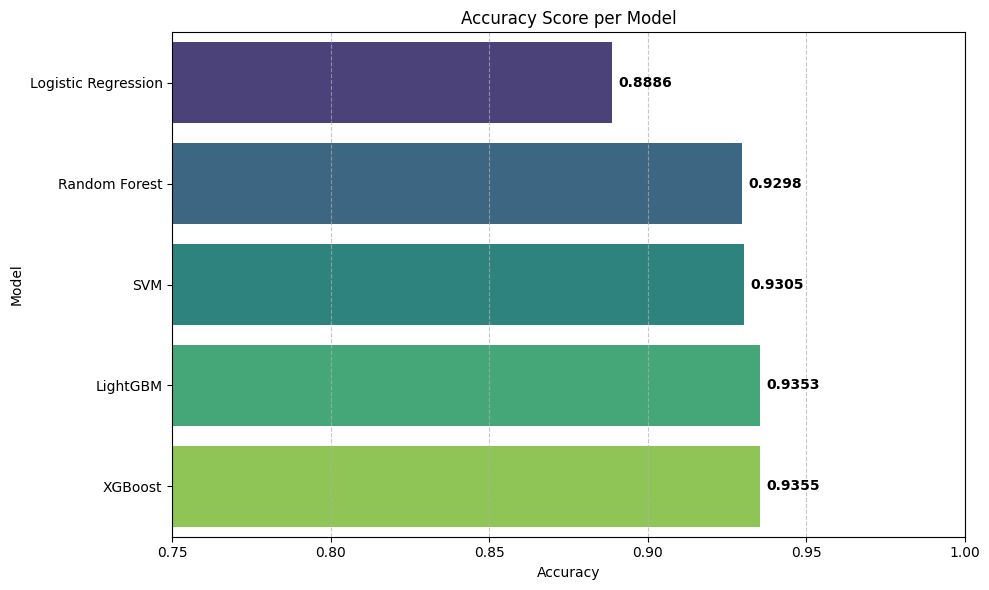

In [16]:
model_names = [
    "Logistic Regression", "Random Forest", "SVM",
    "LightGBM", "XGBoost"
]
accuracy_scores = [0.8886, 0.9298, 0.9305, 0.9353, 0.9355]

df_accuracy = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_accuracy, x='Accuracy', y='Model', palette='viridis')
plt.title('Accuracy Score per Model')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.75, 1.0)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
for i, (acc, model) in enumerate(zip(accuracy_scores, model_names)):
    ax.text(acc + 0.002, i, f"{acc:.4f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()